In [56]:
#If you use Google Colab
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading the dataSet
df = pd.read_csv("/content/drive/My Drive/CIDDS-001-internal-week1.csv")
df = df.drop(["attackType","attackID","attackDescription","Flows","Tos","Src IP Addr","Dst IP Addr"],axis=1)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date first seen,Duration,Proto,Src Pt,Dst Pt,Packets,Bytes,Flags,class
0,2017-03-15 00:01:16.632,0.000,TCP,445,58844.0,1,108,.AP...,normal
1,2017-03-15 00:01:16.552,0.000,TCP,445,48888.0,1,108,.AP...,normal
2,2017-03-15 00:01:16.551,0.004,TCP,48888,445.0,2,174,.AP...,normal
3,2017-03-15 00:01:16.631,0.004,TCP,58844,445.0,2,174,.AP...,normal
4,2017-03-15 00:01:16.552,0.000,TCP,445,48888.0,1,108,.AP...,normal


In [58]:
#We need to convert the Bytes column because it is write 4.5M and not 4 500 000

df['Bytes']=df['Bytes'].astype(str)
df['find']=df['Bytes'].str.find("M")
df.loc[df['find']!=-1,'Bytes']=df['Bytes'].str.slice(stop=-1)
df.loc[df['find']==-1,'Bytes']=df['Bytes']
df['Bytes']=df['Bytes'].astype(float)
df.loc[df['find']!=-1,'Bytes']=df['Bytes'].mul(1000000)
df=df.drop('find',axis=1)
df.head()

,Date first seen,Duration,Proto,Src Pt,Dst Pt,Packets,Bytes,Flags,class
0,2017-03-15 00:01:16.632,0.000,TCP,445,58844.0,1,108.0,.AP...,normal
1,2017-03-15 00:01:16.552,0.000,TCP,445,48888.0,1,108.0,.AP...,normal
2,2017-03-15 00:01:16.551,0.004,TCP,48888,445.0,2,174.0,.AP...,normal
3,2017-03-15 00:01:16.631,0.004,TCP,58844,445.0,2,174.0,.AP...,normal
4,2017-03-15 00:01:16.552,0.000,TCP,445,48888.0,1,108.0,.AP...,normal


In [59]:
#optional
#We put the "Date first seen" as the X-axis on the dataset

df['Date'] = pd.to_datetime(df['Date first seen'])
df = df.set_index('Date')
df.drop(['Date first seen'], axis=1, inplace=True)
df.head()

,Duration,Proto,Src Pt,Dst Pt,Packets,Bytes,Flags,class
Date,,,,,,,,
2017-03-15 00:01:16.632,0.000,TCP,445,58844.0,1,108.0,.AP...,normal
2017-03-15 00:01:16.552,0.000,TCP,445,48888.0,1,108.0,.AP...,normal
2017-03-15 00:01:16.551,0.004,TCP,48888,445.0,2,174.0,.AP...,normal
2017-03-15 00:01:16.631,0.004,TCP,58844,445.0,2,174.0,.AP...,normal
2017-03-15 00:01:16.552,0.000,TCP,445,48888.0,1,108.0,.AP...,normal


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f198a4064e0>,
      dtype=object)

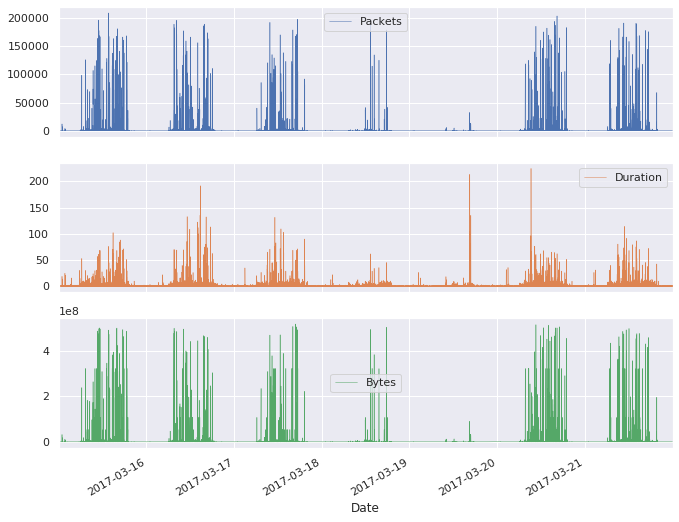

In [60]:
#Some print to see how it looks like

import seaborn as sns

sns.set(rc={'figure.figsize':(11, 9)})
cols_plot=['Packets','Duration','Bytes']
df[cols_plot].plot(linewidth=0.5, subplots=True)

nombre de données : 8451520

répartition des valeurs : 
normal      7010897
attacker     746230
victim       694393
Name: class, dtype: int64



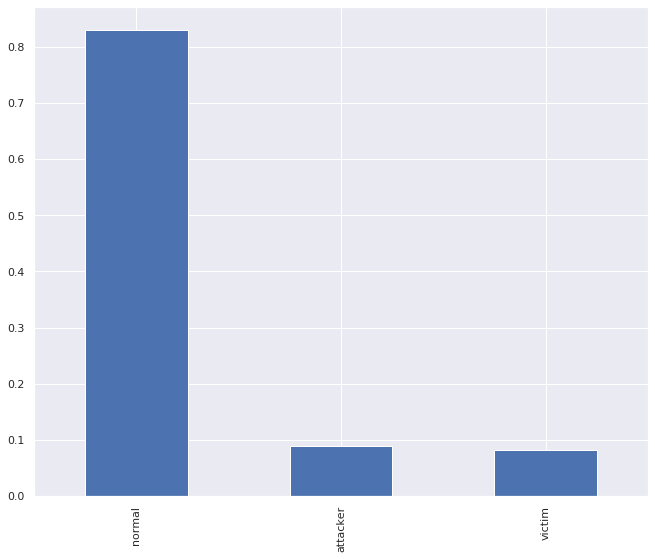

In [61]:
n=df.shape[0]
print("number of rows : "+str(n))
resultat=df['class'].value_counts()
print("\nvalue repartition for class : \n"+str(resultat)+"\n")
resultat=resultat
resultat.plot(kind='bar')

In [0]:
#function to remove some data who are in a certain class
def supprDataAlea(df,clas,nom,frac):
  sus=df.loc[df[clas] == nom]
  sus=sus.sample(frac=frac)
  if frac!=0.0:
    return df.drop(index=sus.index)
  return df

In [0]:
#suppress data to gain speed
df=supprDataAlea(df,'class','normal',0.95)
df=supprDataAlea(df,'class','attacker',0.45)
df=supprDataAlea(df,'class','victim',0.45)

nombre de données : 672494

répartition des valeurs : 
normal      244973
attacker    227778
victim      199743
Name: class, dtype: int64



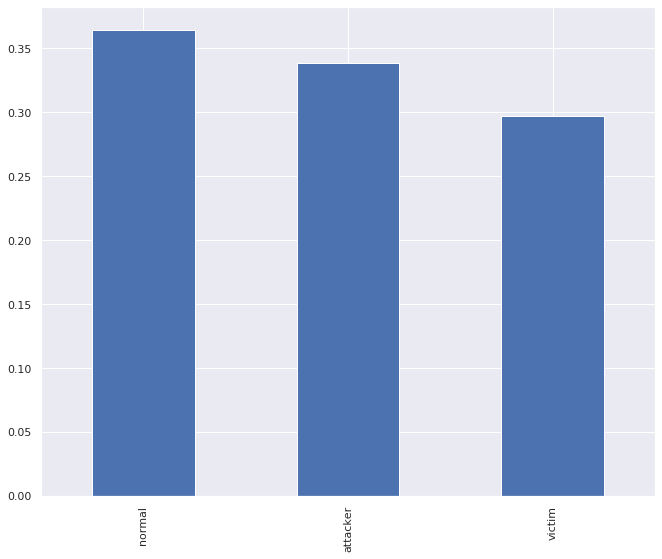

In [64]:
n=df.shape[0]
print("number of rows : "+str(n))
resultat=df['class'].value_counts()
print("\nvalue repartition for class : \n"+str(resultat)+"\n")
resultat=resultat
resultat.plot(kind='bar')

In [65]:
#See the unique values of some features
print(df["Proto"].unique())
print(df["Flags"].unique())
print(df["class"].unique())

['TCP  ' 'UDP  ' 'IGMP ' 'ICMP ']
['.AP...' '......' '....S.' '.A.R..' '.A....' '.A..S.' '.AP.S.' '.AP.SF'
 '...RS.' '.A...F' '...R..' '.AP..F' '.APR..' '.APR.F' '.APRS.' '.A.R.F'
 '.APRSF' '.A.RS.' '.A..SF' '.A.RSF']
['normal' 'attacker' 'victim']


In [66]:
#Proto, Class and Flags become dummy variables

"""
df["Flags"]=df["Flags"].astype("category").cat.codes
df["Proto"]=df["Proto"].astype("category").cat.codes
"""

df= pd.get_dummies(df, columns=['Proto'])


df= pd.get_dummies(df, columns=['Flags'])
df= pd.get_dummies(df, columns=['class'])


df.head()

,Duration,Src Pt,Dst Pt,Packets,Bytes,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP,Flags_......,Flags_....S.,Flags_...R..,Flags_...RS.,Flags_.A....,Flags_.A...F,Flags_.A..S.,Flags_.A..SF,Flags_.A.R..,Flags_.A.R.F,Flags_.A.RS.,Flags_.A.RSF,Flags_.AP...,Flags_.AP..F,Flags_.AP.S.,Flags_.AP.SF,Flags_.APR..,Flags_.APR.F,Flags_.APRS.,Flags_.APRSF,class_attacker,class_normal,class_victim
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-15 00:01:17.777,0.0,443,45487.0,1,357.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2017-03-15 00:01:18.769,0.0,53,35549.0,1,224.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2017-03-15 00:01:29.451,0.0,51431,25.0,1,58.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2017-03-15 00:01:31.454,0.0,51357,52822.0,1,58.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2017-03-15 00:01:32.456,0.0,10616,51357.0,1,54.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [67]:
#bug on Skope Rules because of the space in the features name

df = df.drop(["Flags_......"],axis=1)
df.rename(columns={'Dst Pt':'DstPt',
                   'Src Pt':'SrcPt',
                  'Flags_....S.':'Flags_S',
                  'Flags_...R..':'Flags_R',
                  'Flags_...RS.':'Flags_RS',
                  'Flags_.A...F':'Flags_AF',
                  'Flags_.A....':'Flags_A',
                  'Flags_.A..S.':'Flags_AS',
                  'Flags_.A..SF':'Flags_ASF',
                  'Flags_.A.R..':'Flags_AR',
                  'Flags_.A.R.F':'Flags_ARF',
                  'Flags_.A.RS.':'Flags_ARS',
                  'Flags_.A.RSF':'Flags_ARSF',
                  'Flags_.AP...':'Flags_AP',
                  'Flags_.AP..F':'Flags_APF',
                  'Flags_.AP.S.':'Flags_APS',
                  'Flags_.AP.SF':'Flags_APSF',
                  'Flags_.APR..':'Flags_APR',
                  'Flags_.APR.F':'Flags_APRF',
                  'Flags_.APRS.':'Flags_APRS',
                  'Flags_.APRSF':'Flags_APRSF',
                  'Proto_ICMP ':'ICMP',
                  'Proto_IGMP ':'IGMP',
                  'Proto_TCP  ':'TCP',
                  'Proto_UDP  ':'UDP'},inplace=True)
df.head()

,Duration,SrcPt,DstPt,Packets,Bytes,ICMP,IGMP,TCP,UDP,Flags_S,Flags_R,Flags_RS,Flags_A,Flags_AF,Flags_AS,Flags_ASF,Flags_AR,Flags_ARF,Flags_ARS,Flags_ARSF,Flags_AP,Flags_APF,Flags_APS,Flags_APSF,Flags_APR,Flags_APRF,Flags_APRS,Flags_APRSF,class_attacker,class_normal,class_victim
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-15 00:01:17.777,0.0,443,45487.0,1,357.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2017-03-15 00:01:18.769,0.0,53,35549.0,1,224.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2017-03-15 00:01:29.451,0.0,51431,25.0,1,58.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2017-03-15 00:01:31.454,0.0,51357,52822.0,1,58.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2017-03-15 00:01:32.456,0.0,10616,51357.0,1,54.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
#Preprocessing the data
import sklearn

df=sklearn.utils.shuffle(df)

label_names=["class_attacker","class_normal","class_victim"]
features=df.drop(label_names,axis=1).values
label=df[label_names].values

test_size=(int)(n*(1/3))

X_train=features[:-test_size]
y_train=label[:-test_size]

X_test=features[-test_size:]
y_test=label[-test_size:]

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [0]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def ROCCurve(y_score,zoomed=True):
  lw=2
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(3):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:,i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Compute macro-average ROC curve and ROC area

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(3):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= 3

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure(2)
  plt.plot(fpr["micro"], tpr["micro"],
           label='micro-average ROC curve (area = {0:0.2f})'
                 ''.format(roc_auc["micro"]),
           color='deeppink', linestyle=':', linewidth=4)

  plt.plot(fpr["macro"], tpr["macro"],
           label='macro-average ROC curve (area = {0:0.2f})'
                 ''.format(roc_auc["macro"]),
           color='navy', linestyle=':', linewidth=4)

  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  for i, color in zip(range(3), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=lw,
               label='ROC curve of class {0} (area = {1:0.2f})'
               ''.format(label_names[i], roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([-0.01, 1.01])
  plt.ylim([-0.01, 1.01])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Some extension of Receiver operating characteristic to multi-class')
  plt.legend(loc="lower right")
  plt.show()
  
  if zoomed:
    # ZOOMED
    plt.figure(3)
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(label_names[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 0.2])
    plt.ylim([0.8, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Zoomed')
    plt.legend(loc="lower right")
    plt.show()

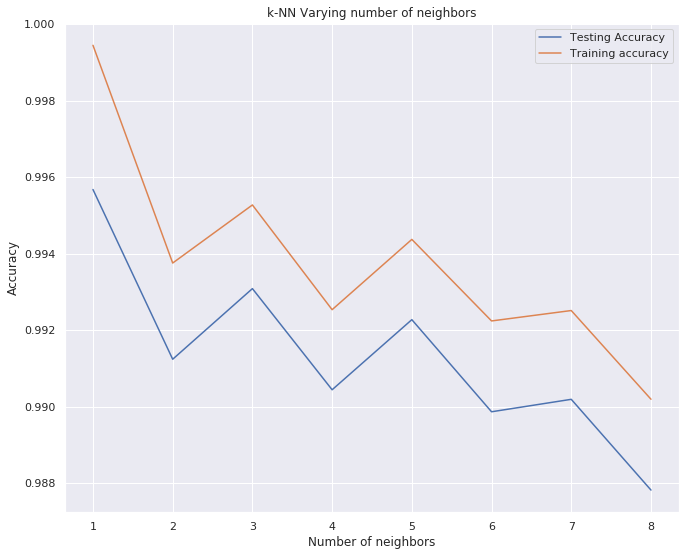

In [71]:
"""
# Test to see with how many neigbours it is the most accurate

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
"""

**KNN**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

knn1 = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=1))
y_pred=knn1.fit(X_train,y_train)

y_pred=y_pred.predict(X_test)

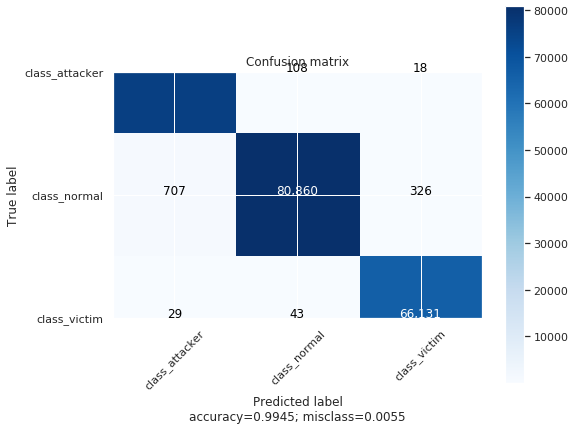

                precision    recall  f1-score   support

class_attacker       0.99      1.00      0.99     76024
  class_normal       1.00      0.99      0.99     81893
  class_victim       0.99      1.00      1.00     66203

     micro avg       0.99      0.99      0.99    224120
     macro avg       0.99      0.99      0.99    224120
  weighted avg       0.99      0.99      0.99    224120
   samples avg       0.99      0.99      0.99    224120



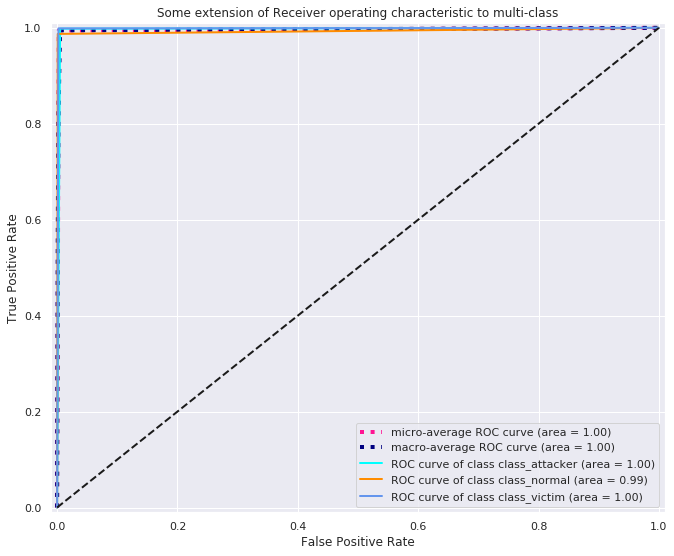

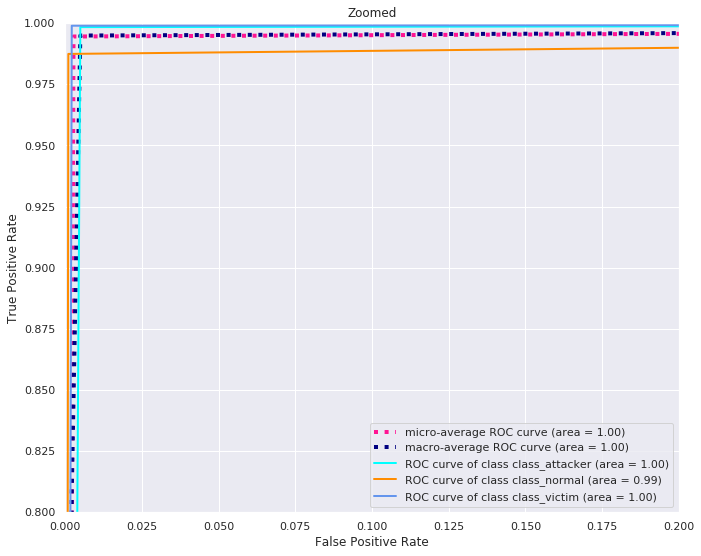

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
plot_confusion_matrix(cm,target_names=label_names, normalize=False)
print(classification_report(y_test,y_pred,target_names=label_names))

y_scoreKNN=knn1.predict_proba(X_test)

ROCCurve(y_scoreKNN)

**DECISION TREE**

In [0]:
from sklearn import tree

ctree = OneVsRestClassifier(tree.DecisionTreeClassifier())

clftree = ctree.fit(X_train,y_train)

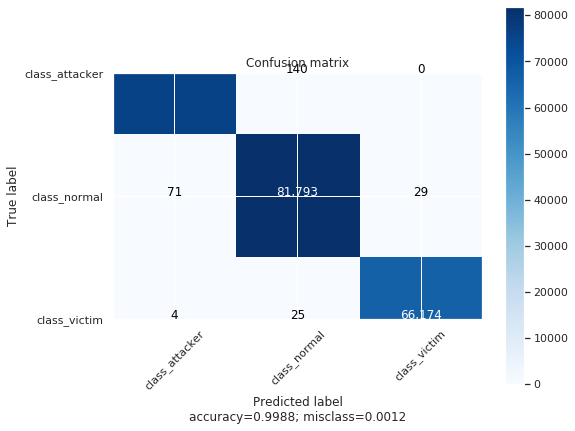

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


                precision    recall  f1-score   support

class_attacker       1.00      1.00      1.00     76024
  class_normal       1.00      1.00      1.00     81893
  class_victim       1.00      1.00      1.00     66203

     micro avg       1.00      1.00      1.00    224120
     macro avg       1.00      1.00      1.00    224120
  weighted avg       1.00      1.00      1.00    224120
   samples avg       1.00      1.00      1.00    224120



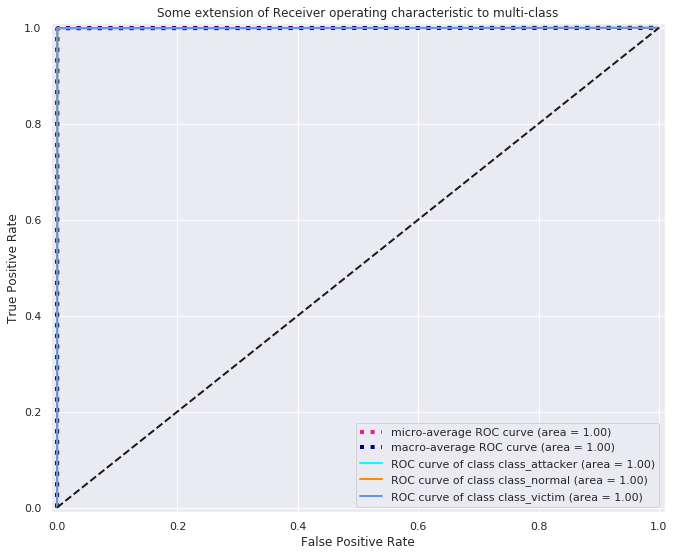

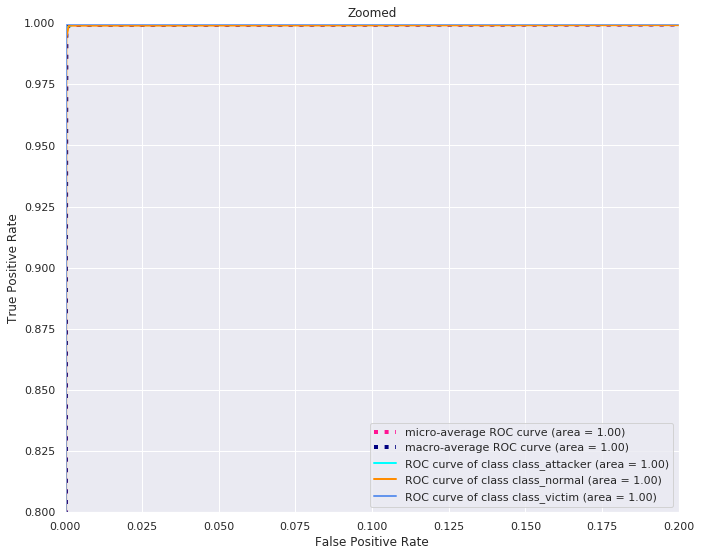

In [47]:
y_predTree=clftree.predict(X_test)

cmTree=confusion_matrix(y_test.argmax(axis=1),y_predTree.argmax(axis=1))

plot_confusion_matrix(cmTree,target_names=label_names, normalize=False)
print(classification_report(y_test,y_predTree,target_names=label_names))

y_scoreTree=ctree.predict_proba(X_test)

ROCCurve(y_scoreTree)

**FOREST**

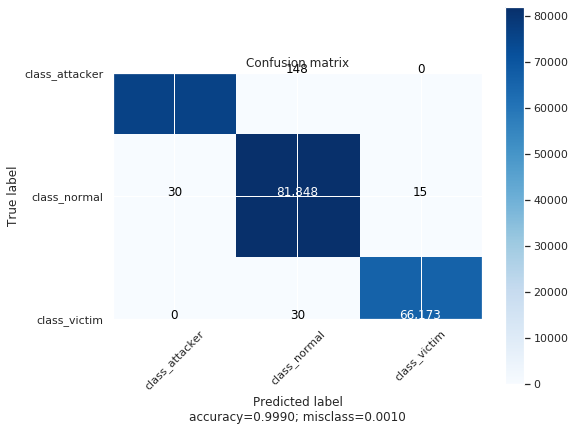

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


                precision    recall  f1-score   support

class_attacker       1.00      1.00      1.00     76024
  class_normal       1.00      1.00      1.00     81893
  class_victim       1.00      1.00      1.00     66203

     micro avg       1.00      1.00      1.00    224120
     macro avg       1.00      1.00      1.00    224120
  weighted avg       1.00      1.00      1.00    224120
   samples avg       1.00      1.00      1.00    224120



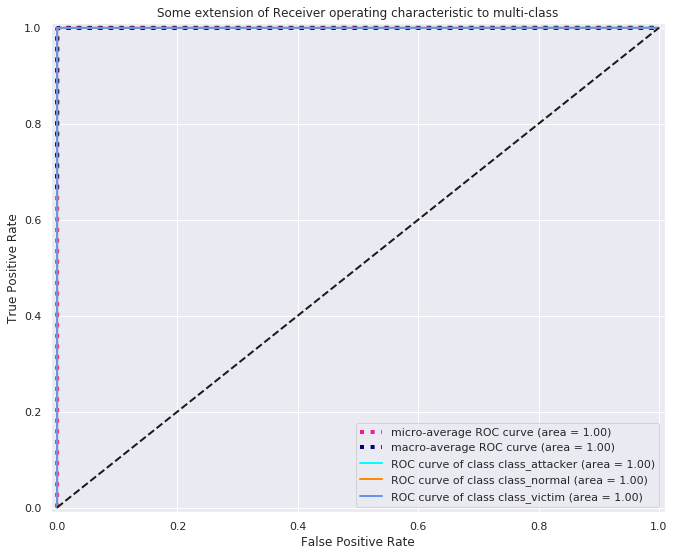

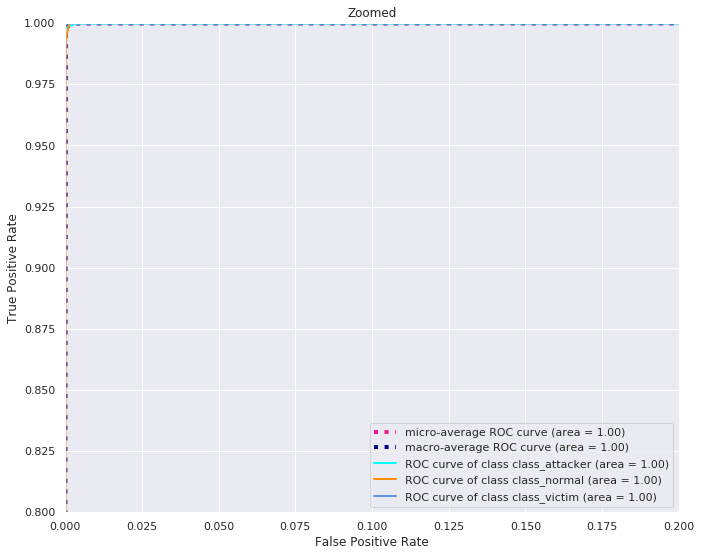

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

RF=OneVsRestClassifier(RandomForestClassifier(n_estimators=100))
clfForest=RF.fit(X_train,y_train)

y_predForest=clfForest.predict(X_test)

cmForest=confusion_matrix(y_test.argmax(axis=1),y_predForest.argmax(axis=1))

plot_confusion_matrix(cmForest,target_names=label_names, normalize=False)
print(classification_report(y_test,y_predForest,target_names=label_names))

y_scoreForest=RF.predict_proba(X_test)

ROCCurve(y_scoreForest)

**NEURAL NETWORK**





/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


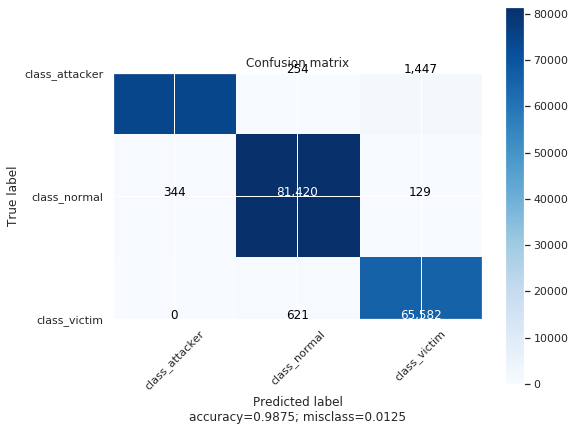

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


                precision    recall  f1-score   support

class_attacker       1.00      0.81      0.90     76024
  class_normal       0.99      0.99      0.99     81893
  class_victim       0.62      1.00      0.76     66203

     micro avg       0.83      0.93      0.88    224120
     macro avg       0.87      0.94      0.88    224120
  weighted avg       0.88      0.93      0.89    224120
   samples avg       0.84      0.93      0.87    224120



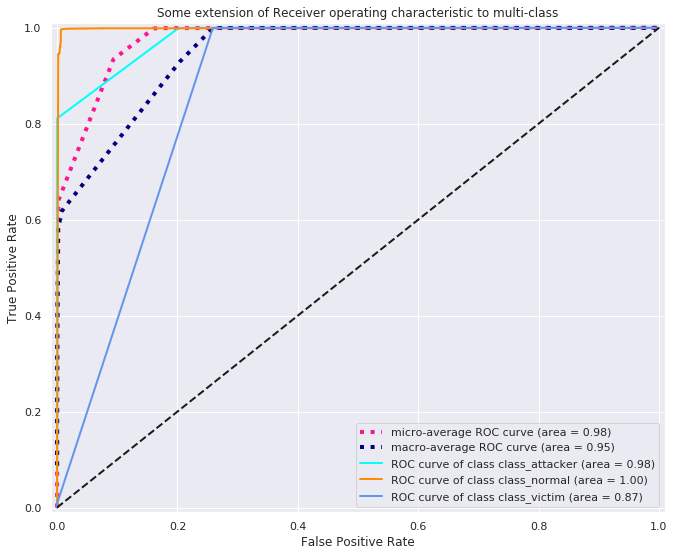

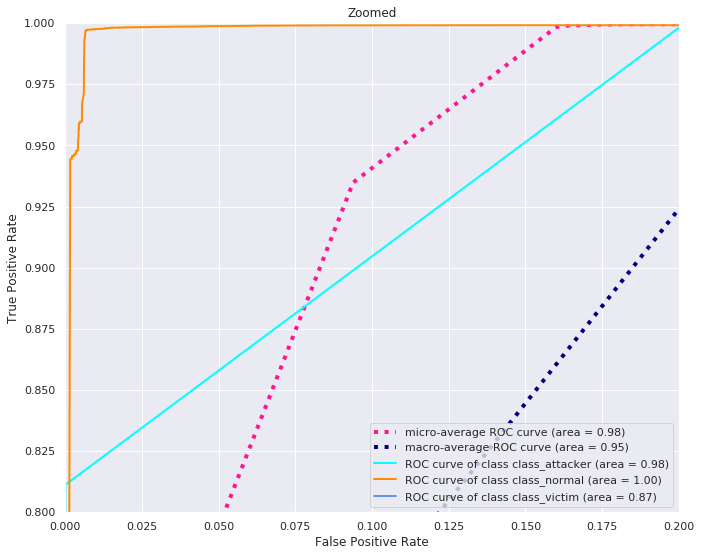

In [55]:
from sklearn.neural_network import MLPClassifier

NN=OneVsRestClassifier(MLPClassifier(max_iter=200))
clfNN=NN.fit(X_train,y_train)

y_predNN=clfNN.predict(X_test)

cmNN=confusion_matrix(y_test.argmax(axis=1),y_predNN.argmax(axis=1))

plot_confusion_matrix(cmNN,target_names=label_names, normalize=False)
print(classification_report(y_test,y_predNN,target_names=label_names))

y_scoreNN=NN.predict_proba(X_test)

ROCCurve(y_scoreNN)